<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Артем! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Лемматизация</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#DistilBert" data-toc-modified-id="DistilBert-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DistilBert</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
import time
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from pandarallel import pandarallel 

tqdm.pandas(desc="progress")
pandarallel.initialize(progress_bar = True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import re
import string

sw = stopwords.words('english')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Прекрасная
[nltk_data]     Анастасия\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Прекрасная
[nltk_data]     Анастасия\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Прекрасная
[nltk_data]     Анастасия\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Прекрасная
[nltk_data]     Анастасия\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [2]:
RANDOM_STATE=42

Загрузим и рассмотрим датасет

In [3]:
toxic_comments = pd.read_csv('toxic_comments.csv', index_col=[0])

In [4]:
display(toxic_comments.sample(10))
print('Всего комментарий:',toxic_comments.shape[0])
print('Количество не токсичных комментарий:',toxic_comments['toxic'].value_counts()[0])
print('Количество токсичных комментарий:',toxic_comments['toxic'].value_counts()[1])


,text,toxic
102408,"""\n Not sure what you mean. I deleted nothing ...",0
143059,"Cobden, Ontario\n\nHello, I'm a moderate user ...",0
150366,Hey Kevin D \n\nYou like weird music.\nAnd wh...,0
102281,SandyGeorgia\n\nI have just sent you an email ...,0
154685,", 3 June 2010 (UTC)\nBustin' Out of L Seven wa...",0
139922,"""\n\nWho's denying anything. I'm the one that ...",0
31350,Cephalosporin structures \n\nHi Antony. I see ...,0
146453,Trafalgar class SSNs\nJust to let you know i'v...,0
32553,This is only one of numerous questions about t...,0
69045,"It's your loss, fuck-knuckle. I give you the '...",1


Всего комментарий: 159292
Количество не токсичных комментарий: 143106
Количество токсичных комментарий: 16186


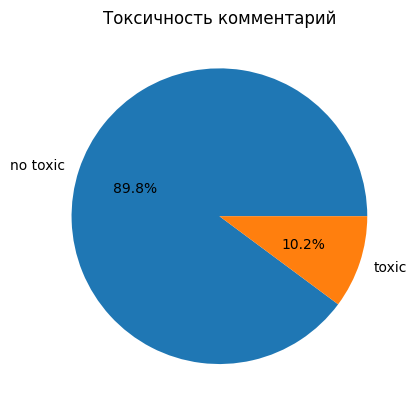

In [5]:
fig1, ax1 = plt.subplots()
plt.title("Токсичность комментарий")
ax1.pie(toxic_comments['toxic'].value_counts(),labels=('no toxic', 'toxic'), autopct='%1.1f%%')
plt.show()

Из данных видно что присутствует дисбаланс классов, учтем это в дальнейшем при обучении моделей

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 


Плюс за

    

-  проверку на сбалансированность 



- промежуточный вывод в конце раздела


<div class="alert alert-warning">

Совет: 




- на несбалансированность обратил внимание, это хорошо, но у тебя во всем проекте нет ни одного графика, а ведь красивый, хорошо оформленный график может быть украшением проекта. Почему бы тут его не использовать?   
    
    
- .sample() вместо .head(), ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail)     
   







<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил диаграмму выше и прешел везде на sample().</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Артём!  Принято




</div>


### Лемматизация

Выполним лемматизацию, приведение к нижнему регистру и очистку текста от пунктуации и пр.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



- WordNetLemmatizer  рабочий вариант, но у него есть особенности, для корректной работы ему нужно передавать не просто слово, но и POS-тег (Part of Speech, части речи). Набираемся ума-разума [тут](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/) )  Обрати внимание на функцию `get_wordnet_pos`. Сразу хочу предупредить, что если делать Лемматизацию правильно, сучетом постегов, то время может занять полчаса-час. Так что не удивляйся (вообще советую сохранить результаты Лематизации в каком-то файлике, чтобы каждый раз не тратить на это много времени)



(можешь воспользоваться кодом ниже)







<div class="alert alert-warning">


Совет: 




- лемматизацию можно было сделать с помощью SpaCy лемматизатором и прямо скажем как инструмент он более удобен и универсален, не нужно заморачиваться с токенизацией и учётом пос тегов




- Чтобы сэкономить время, и убедиться что всё отработало нормально, берёшь парочку предложений, создаёшь dataframe
    
    
    sentence1 = "The striped bats are hanging on their feet for best"
    sentence2 = "you should be ashamed of yourself went worked"
    df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
    print(df_my)


    print(df_my['text'].apply(func))
    
    
    
И тестируешь не нем, должно получиться 
    
    
    
    striped  ------> strip, went -------> go  



Если всё получилось, то можно использовать на всём датасете

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил ниже.</div>



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Возможно всё дело в локальном компьютере, а возможно  дело в том что ты не добавила функцию импорта. По схеме ниже у меня получилось ускориться в Colab

    
    #код ревьюера 
    
    
    from pandarallel import pandarallel   
    tqdm.pandas(desc="progress")
    pandarallel.initialize(progress_bar = True)
    import nltk
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')

    def get_preprocessed_text(document):
        '''
        Функция производит предобработку текста.
        Текст приводится в нижний регистр, токенизируется.
        POS-теги nltk сопоставляются с форматом, принятым
        лемматизатором wordnet, после чего текст лемматизируется
        с использованием тегов.

        Параметры:
        ----------
        document : str
            Текст в виде строки.

        Возвращает:
        -----------
        Обработанный текст в виде строки.
        '''
        # загружаем необходимые пакеты внутри функции
        # этого требует pandarallel
        # import nltk
        from nltk.tokenize import word_tokenize
        from nltk.corpus import wordnet
        from nltk.corpus import stopwords
        from nltk.stem.wordnet import WordNetLemmatizer

        # приводим к нижнему документ регистру
        document = document.lower()
        # разделяем документ на токены
        document = word_tokenize(document)

        # объявляем внутреннюю функцию сопоставления POS-тегов nltk
        # с форматом, принятым лемматизатором wordnet
        def get_wordnet_pos(token):
            # получаем первую букву тега
            tag = nltk.pos_tag([token])[0][1][0].upper()
            # создаём словарь соответствия
            tag_dict = {"J": wordnet.ADJ,
                        "N": wordnet.NOUN,
                        "V": wordnet.VERB,
                        "R": wordnet.ADV}
            # возвращаем соответсвующий тег wordnet
            return tag_dict.get(tag, wordnet.NOUN)

        # инициируем лемматизатор
        lemmatizer = WordNetLemmatizer()
        # применяем лемматизацию, используя теги
        document = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in document]

        # инициируем множество стоп-слов
        stop_words = set(stopwords.words('english'))
        # удаляем стоп-слова из документа
        document = [token for token in document if token not in stop_words]

        # возвращаем результат
        return document


    df['lemmatized_paralel'] = df['text'].parallel_apply(get_preprocessed_text) 
    
    
    

In [6]:
def get_preprocessed_text(document):
    import nltk
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import wordnet
    from nltk.corpus import stopwords
    from nltk.stem.wordnet import WordNetLemmatizer

    document = document.lower()
    document = word_tokenize(document) 
    
    def get_wordnet_pos(token):
        # получаем первую букву тега
        tag = nltk.pos_tag([token])[0][1][0].upper()
        # создаём словарь соответствия
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        # возвращаем соответсвующий тег wordnet
        return tag_dict.get(tag, wordnet.NOUN)
    # инициируем лемматизатор
    lemmatizer = WordNetLemmatizer()
    # применяем лемматизацию, используя теги
    document = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in document]
    # инициируем множество стоп-слов
    stop_words = set(stopwords.words('english'))
    # удаляем стоп-слова из документа
    document = [token for token in document if token not in stop_words]   
    # возвращаем результат
    return " ".join(document)

In [7]:
toxic_comments['tokenized_text'] = toxic_comments['text'].parallel_apply(get_preprocessed_text) 

In [8]:
# Очищаем текст от символов пунктуации
def clear_text(text):
    import re
    pattern = r'[a-zA-Z]+'
    text = re.findall(pattern, text)
    return " ".join(text)
toxic_comments['tokenized_text'] = toxic_comments['tokenized_text'].parallel_apply(clear_text)    

In [9]:
toxic_comments.sample(10)

,text,toxic,tokenized_text
140950,non-sover. states \n\nFor all non-sover. state...,0,non sover state non sover state like hong kong...
40204,"""::This is by far the best attitude and the mo...",0,this far best attitude helpful suggestion offe...
155469,And there was absolutely no need for India to ...,0,absolutely need india interfere create confusi...
120463,Jesus. Fuck. Honesty! 86.42.90.145,1,jesus fuck honesty
96964,COI \nthe article focuses too much on the self...,0,coi article focus much self promotion show cas...
24125,"Either you hate science, or you support con ar...",0,either hate science support con artist m sorry...
44545,".\n\nPlus, you're stooping below Joseph Stalin...",1,plus re stoop joseph stalin revisionist histor...
158676,"""\n\nPregnancy image duplicate\nCan you shut d...",0,pregnancy image duplicate shut duplicate rfc o...
6655,well... \n\ni made the edits to johns page bec...,0,well make edits john page knew would get atten...
126632,"""\n\nUnfortunately, when you add a name parame...",0,unfortunately add name parameter template alre...


Сохраним датасет после лемматизации и очистки.

In [10]:
toxic_comments.to_csv('C:/Users/Прекрасная Анастасия/Documents/яндекс практикум/projects/toxic_comments_lemm.csv', index= True)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Теперь алиматизация проведена корректно.  И хороший ход сохранить результаты лемматизации и очистки в отдельный файл


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




- Плюс за использование apply, неэффективные циклы нам ни к чему.


- Да, всегда лучше проверить что получилось  в итоге, так всегда будет возможность поправить ошибку

<div class="alert alert-warning">


Совет: 


   


- после очистки и лемматизации (и убрав стопслова) можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах Кроме того графики, рисунки делают проект визуально интересней
    
В тренажере облако импортируем так

    !/opt/conda/bin/python -m pip install wordcloud 


или

    !/opt/conda/bin/python -m pip install wordcloud==1.8.2.2  


И возможно дополнительно надо будет сделать



    !pip install --upgrade Pillow  (попробуй версию 9.5.0)




Выведем облако слов для визуализации частоты используемых слов 

In [11]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS 

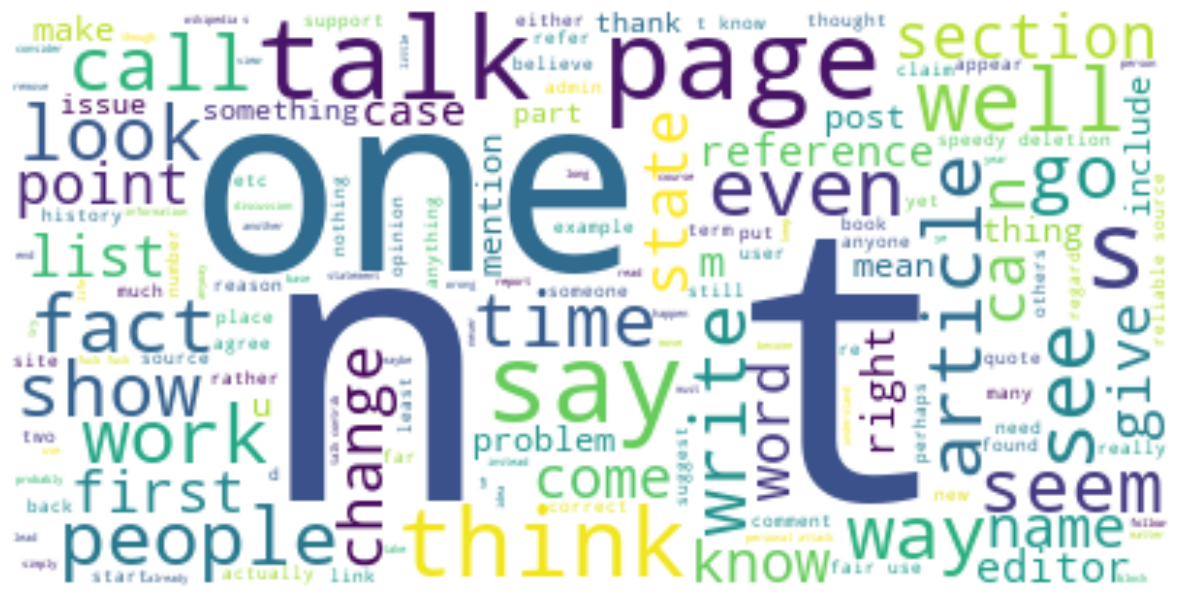

In [12]:
tokenized_text = " ".join(i for i in toxic_comments.tokenized_text)
stopwords_wc = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords_wc, background_color="white").generate(tokenized_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Красивое облако, но было бы информативнее построить облако отдельно для токсичных и нетоксичных. И сразу будет видна разница

Выполним посчет количества слов в тексте

In [13]:
def calc_len(text):
    text = text.split()
    length = len(text)
    return length   
toxic_comments['text_len'] = toxic_comments['tokenized_text'].parallel_apply(calc_len)
toxic_comments.sample(10)

,text,toxic,tokenized_text,text_len
154762,kwazy kweries\nDo you purposely antagonize peo...,0,kwazy kweries purposely antagonize people natu...,11
48225,Removed biased text from article.,0,remove bias text article,4
77531,"quick note \n\nDear Flex,\n\nThe new Wiki Cons...",0,quick note dear flex new wiki conservapedia co...,25
137115,You have now been blocked from editing.,0,block edit,2
28671,"""\n\n""""Phythian clearly cites Murray Waas and ...",0,phythian clearly cite murray waas craig unger ...,10
122856,3. You need editors assigned per subject. The ...,0,need editor assign per subject current situati...,22
53674,"Wow, god, can you get him to wake up and reali...",0,wow god get wake realize hell ve,7
8593,"""\n\n Re:CUplex \n\nHello Tungilik!\n\nUnfortu...",0,cuplex hello tungilik unfortunately even tough...,245
95675,Please review your extreme decision taking int...,0,please review extreme decision take account ac...,44
34949,"""\nWhere would you like to see Wikimedia in fi...",0,would like see wikimedia five year submit prop...,423


In [14]:
print('Количество комментарий из одного и меньше слов:',(toxic_comments['text_len']<1).sum())

Количество комментарий из одного и меньше слов: 52


Удалим комментарии с отсутствием слов

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Хорошо бы обосновать


<div class="alert alert-info"> <b>Комментарий студента:</b> Комментарии без слов считаю нерепрезентативными, поэтому и избавляюсь от них.</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



наверное только эксперименты с метрикой могли бы рассудить,  насколько достоверно это предположение.  Кроме того если нам придётся делать прогноз на реальном примере из 1 слова. Модель может оказаться не готовой к этому


In [15]:
toxic_comments = toxic_comments.drop(index=toxic_comments[toxic_comments['text_len']<1].index)

Скопируем на данном этапе очищенный датафрейм для использования модели Bert

In [16]:
toxic_comments_clean_bert = toxic_comments.copy().drop(['tokenized_text', 'text_len'], axis=1)
toxic_comments_clean_bert.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Действительно считается что Берт способен учитывать контекст слов стоящих в разных падежах и стопслова для него убирать не нужно




</div>


In [17]:
toxic_comments.sort_values(by='text_len', ascending=False).head(10)

,text,toxic,tokenized_text,text_len
147694,Just To Let You Know. You have no life.\nI hat...,1,let know life hate you i hate you i hate you i...,1348
76542,DIE FAG DIE FAG DIE FAG DIE FAG DIE FAG DIE FA...,1,die fag die fag die fag die fag die fag die fa...,1250
32114,PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PI...,1,pig pig pig pig pig pig pig pig pig pig pig pi...,1250
149925,LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LO...,0,lol lol lol lol lol lol lol lol lol lol lol lo...,1250
153236,FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT JE...,1,fat jew fat jew fat jew fat jew fat jew fat je...,1247
32371,THAT WAS REALLY MILLESECONDS WASNT IT BITCH \n...,1,really milleseconds wasnt bitch fat jew fat je...,1235
106871,hi moron hi moron hi moron hi moron hi moron h...,1,hi moron hi moron hi moron hi moron hi moron h...,1078
6564,Sex sex sex sex Sex sex sex sexSex sex sex sex...,1,sex sex sex sex sex sex sex sexsex sex sex sex...,1001
13041,fuck u bitches.fuck u bitches.fuck u bitches.f...,1,fuck u bitches fuck u bitches fuck u bitches f...,1000
101685,SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER ...,1,super gay super gay super gay super gay super ...,1000


Создадим корпус слов

In [18]:
corpus = set()
for sentence in toxic_comments.tokenized_text.tolist():
    for word in sentence.split():
        corpus.add(word)

In [19]:
len(corpus)

156784

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Не забываем убирать стоп слова (Это классика когда используем TF-IDF),  код побежит быстрей. Хотя должен сказать что на метрику это позитивное не скажется 

    
<div class="alert alert-warning">


Совет:     

Вопросик:

А стопслова важней убирать  когда мы используем TF-IDF, или когда используе обычный CountVectorizer? 



<div class="alert alert-info"> <b>Комментарий студента:</b> В обоих случаях удаление стоп-слов является хорошей практикой, чтобы улучшить эффективность и интерпретируемость векторизации текста</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍

Вижу ты стопслова убирал два раза


## Обучение

### Логистическая регрессия

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- random_state на месте


- правильно разбито на 2 выборки (иногда студенты использующие GS разбивают на 3 датасета)


- здорово что используешь stratify    





<div class="alert alert-warning">



Совет: 


Лучше разнести в разные ячейки сплит и моделирование. Так будет вернее стилистически

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


- Не забываем при инициализации модели о random_state, иначе после каждого запуска кода у нас может быть разный результат


- В нашем задании мы максимизируем f1, вот его и столько использовать лапа хлора гиперхомет   

<div class="alert alert-warning">





Совет: 




Молодец что используешь GridSearch, но еще лучше использовать связку GridSearchCV + pipeline. 


О pipeline:

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), это тема которая сразу затрагивает кроссвалидацию, тюнинг "векторайз", подбор гиперпараметров модели и о том что код стоит делать компактным.
    
    
- в TfidfVectorizer(stop_words=stopwords) у тебя по умолчанию ngram_range=(1, 1), тут можно подбирать разное число n- грамм (и другие параметры), максимизируя метрику, но как объединить перебор по ngram_range с обучением моделей, чтобы не делать это по отдельности или с использованием цикла?! pipeline! Готовый [пример для работы с текстами](https://medium.com/@yoni.levine/how-to-grid-search-with-a-pipeline-93147835d916). Всё что нужно там есть, хотя очень лаконично. Можешь погуглить по:


    
    pipeline nlp gridsearchcv



- как избежать ошибки подглядывания в будущее, когда мы предварительно работаем с данными (шкалирование, нормализация, TfidfVectorizer итп итд)? pipeline! особенно это важно, когда мы используем кроссвалидацию. Для TfidfVectorizer делаем .fit (обучаемся) на train, а transform на test, но точно также нужно сделать для валидационной выборки. Но GS делает валидационные внутри себя, спрашивается как добраться до нее и избежать подглядывания в будущее? Казалось бы никак, но нет! Pipeline! ) 
    
    
- pipeline позволяет делать наш код компактней и читабельней, это большой плюс, когда код будет раздуваться     
    
    

         
Если раньше не использовал pipeline то могу посоветовать видео в котором [индус](https://www.youtube.com/watch?v=mOYJCR0IDk8&ab_channel=HimanshuChandra) на английском с сильным акцентом, но на пальцах обьясняет  самое непонятное (по моему опыту): сопряженность методов fit и transform. Там же есть и код и ссылка на текст. Мне помогло )



В общем если сделать GS+pipeline будет вообще хорошо )  
    
<div>   




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет: 


А ещё можешь посмотреть какие слова  является наиболее важным для классификации с точки зрения модели. Получаем список слов    
    
    
    
    .get_feature_names_out().tolist()
    
    
    
Получаем коэффициенты важности (для логистической регрессии)    
    
    .coef_.tolist()[0]







А потом можно построить такой-то красивый график с помощью     seaborn



А ещё есть такая интересная библиотека shap — позволяет детально изучить работу модели, в том числе оценить важность признаков, при этом не привязана к работе конкретного алгортима прогнозирования. Вот статья с описанием ее работы — https://habr.com/ru/articles/428213/ и детальный разбор графиков - https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

Используем векторизатор Tfidf и классификатор LogisticRegression в пайплайне

In [20]:
from sklearn.pipeline import Pipeline

In [26]:
stop_words = set(stopwords.words('english'))

pipe = Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words=list(stop_words),min_df=5)),
                       ('classifier', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=200))
                      ])

In [27]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['not', 've', 'we', 'each', 'once',
                                             "didn't", 'mustn', "you'd",
                                             'herself', 'down', 'shan',
                                             'against', 'won', 'during',
                                             "shan't", 'did', 'where', 'how',
                                             "mightn't", "you've", 'here',
                                             'about', 'have', 'll', 'by',
                                             'yours', 'she', "it's", 'up',
                                             "don't", ...])),
                ('classifier',
                 LogisticRegression(max_iter=200, random_state=42,
                                    solver='liblinear'))])

Выделим таргет и разделим на выборки

In [28]:
X = toxic_comments['tokenized_text']
y = toxic_comments['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = RANDOM_STATE)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Ошибка:



    train_test_split(X, y, test_size=0.25, stratify=y)   ------> train_test_split(X, y, test_size=0.25, stratify=y, random_state = 42)

Применяем GridSearchCV для поиска лучших гиперпараметров

In [29]:
param_grid = {'vectorizer__ngram_range': [(1,1), (1,2)],              
              'classifier': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',class_weight='balanced')],
              'classifier__C': np.logspace(-3,3,7),
              'classifier__penalty' : ['l1', 'l2'],
             }
model = GridSearchCV(pipe, param_grid, scoring='f1', cv=10, verbose=True, n_jobs=-1)
best_grid = model.fit(X_train,y_train)
print('tuned hyperparameters :(best parameters)', model.best_params_)
print('f1 score:', model.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
tuned hyperparameters :(best parameters) {'classifier': LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear'), 'classifier__C': 10.0, 'classifier__penalty': 'l2', 'vectorizer__ngram_range': (1, 2)}
f1 score: 0.7690034013420125


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


    
    
Отличная работа, использование связки GridSearch + pipeline это уже другой уровень. Здорово что попробовал поперебирать и ngram_range, хотя наверное это было трудоёмко
    
    

    
   
<div class="alert alert-warning">


Совет:  



На будущее    
    
    
- Совет 1, развития темы использования pipeline
    
    
Как создавать собственные функции в pipeline (мы пользовались стандартными из sklearn - Scaler, MinMax, или как в этом проекте TFIDF итп)    


Можешь взять за основу [Ссылка 1](https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-polzovatelskih-preobrazovatelei-dannyh-62b2a9a80e49941961ffc7a2),
[Ссылка 2](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156)

    
    
    
    
- Совет 2, как можно улучшить метрику использовав дополнительные признаки, опять же оформив это  в pipeline  
    
    

Можешь попробовать  feature_engenering (Это когда мы создаём собственные признаки. Во многих случаях это более эффективный способ повысить нашу метрику,  чем долго обучать разные модели) c pipeline:   


    

    
1. Сгенерировать новые фичи, например например посчитать число слов в тексте, длину слов, число знаков препинания, число слов с заглавной итп итд. 
    
   
    
2. Добавить к фичам от векторайзера
    
    
Это можно было реализовать в последующей схеме через [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), [отличная статья, я смотрю через VPN](https://medium.com/mlearning-ai/neat-data-preprocessing-with-pipeline-and-columntransformer-2a0468865b6b):
    
    
    new_features = ['lengh', 'number', ....]
    # имена столбцов которых у нас записаны новые фичи (lengh - допустим длина слов твитах, number - количество слов в твите...). И пусть на эти признаки будем Scaler
    
    # lemmatized_text - столбец с текстом
    
    features = ColumnTransformer(
                        [("text_preprocess", TfidfVectorizer(stop_words=stopwords), "lemmatized_text"),
                         ("new_features_preprocess", StandardScaler(), new_features)
                        ])

    
    pipe = Pipeline([('features_all_prepross', features),
                     ('model', LogisticRegression(random_state = 42))
                    ])

Какие именно признаки сгенерировать, это целое искусство. Студенты которые использовали библиотеку
    
    
    from nltk.sentiment.vader import SentimentIntensityAnalyzer    

смогли чуть поднять метрику )

In [32]:
#pipe.set_params(**model.best_params_)
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(min_df=5,
                                 stop_words=['not', 've', 'we', 'each', 'once',
                                             "didn't", 'mustn', "you'd",
                                             'herself', 'down', 'shan',
                                             'against', 'won', 'during',
                                             "shan't", 'did', 'where', 'how',
                                             "mightn't", "you've", 'here',
                                             'about', 'have', 'll', 'by',
                                             'yours', 'she', "it's", 'up',
                                             "don't", ...])),
                ('classifier',
                 LogisticRegression(max_iter=200, random_state=42,
                                    solver='liblinear'))])

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



А вот это зачем? Не надо воспринимать  GS как способ получить .best_params_, чтобы подставить их в модель и обучить на них. GS это сделал уже и модельку положил тут: .best_estimator_


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Current F1-score = 0.74
Current Accuracy = 0.96


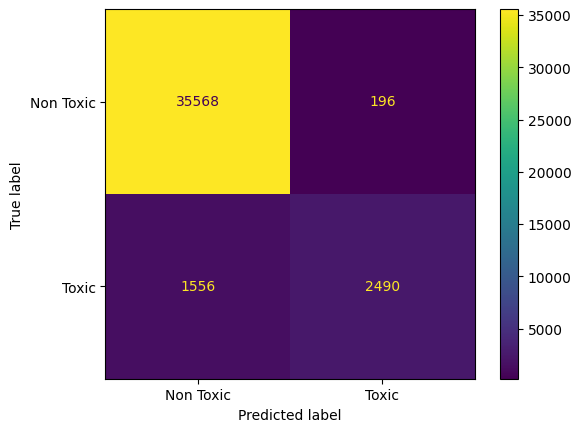

In [34]:
preds = pipe.predict(X_test)
print(f'Current F1-score = {f1_score(y_test, preds):.2f}')
print(f'Current Accuracy = {accuracy_score(y_test, preds):.2f}')

cm = confusion_matrix(y_test, preds, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Toxic', 'Toxic'])
disp.plot()
plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Результат получен, и здорово что использовал ConfusionMatrixDisplay для лучшей визуализации матрицы ошибок


### DistilBert

Рассмотрим работу нейронной сети DistilBert

Импортируем необходимые библиотеки

In [ ]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import classification_report
from datasets import load_dataset, get_dataset_split_names, Dataset
from transformers import DataCollatorWithPadding

Для ускорения работы пробуем запустить на gpu

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
device

На текущей машине запуск на gpu невозможен

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




Здорово что используешь gpu (где это возможно)



Инициализация модели

In [ ]:
MODEL_NAME = "distilbert-base-uncased"

Подготовка данных для библиотеки Hugging Face

In [ ]:
toxic_comments_clean_bert.rename(columns = {'toxic' : 'label'}, inplace = True) 
toxic_comments_clean_bert

In [ ]:
train, test = train_test_split(toxic_comments_clean_bert, test_size=0.25, random_state = 42)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Ошибка:


И тут
    
    
    train_test_split(toxic_comments_clean_bert, test_size=0.25)   ------> train_test_split(toxic_comments_clean_bert, test_size=0.25, random_state = 42)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Не забываем  о random_state, иначе после каждого запуска кода у нас может быть разный результат


</div>


In [ ]:
dataset_train = Dataset.from_pandas(train)
dataset_train

In [ ]:
dataset_test = Dataset.from_pandas(test)
dataset_test

Токенизируем тексты для модели

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Функция для предобработки с использованием токенайзера

In [ ]:
def preprocess_function(sample):
    return tokenizer(sample["text"], truncation=True)

Применяем токенизатор на выборках разбивая на батчи

In [ ]:
tokenized_wsh_train = dataset_train.map(preprocess_function, batched=True)

In [ ]:
tokenized_wsh_test = dataset_test.map(preprocess_function, batched=True)

С помощью DataCollator преобразуем данные в вектора и приводим к одинаковому размеру

In [ ]:
data_collacator = DataCollatorWithPadding(tokenizer=tokenizer)

Загрузим предобученную модель.Так как данная задача бинарной классификации, установим количество нейронов равной 2.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels = 2)

In [ ]:
training_args = TrainingArguments(
    output_dir = "./result",
    per_device_train_batch_size = 16,
    learning_rate = 2e-5,
    num_train_epochs = 1,
    weight_decay = 0.01
)

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collacator,
    train_dataset = tokenized_wsh_train,
    tokenizer = tokenizer,   
)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


- Маловато полезной информации выводится при обучении (ошибка на тренировочной для нас малоинформатив). Я бы посоветовал подать в аргумент   compute_metrics метрику f1, который нас и интересует
    
- плохая практика не использовать eval_dataset. на train_dataset мы двигаясь по антиградиенту обучаем модель, а на валидационной отслеживаем качество обучения. А тут можешь посмотреть, тут как раз тоже использован DataCollatorWithPadding  https://huggingface.co/blog/sentiment-analysis-python

- Trainer здорово нам облагчает работу. С другой стороны весьма полезно написать  цикл со всеми стадиями обученияи графиком для демонстрации улучшение метрики на валидационные выборке по итерациям   


Системную настройка для работы Haggin Face

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
model = model.to(device)

Процесс обучения

In [ ]:
trainer.train()

In [ ]:
predictions = trainer.predict(tokenized_wsh_test)

In [ ]:
print(classification_report(tokenized_wsh_test['label'], predictions.label_ids))

###### Модель с абсолютной точностью классифицировала комментарии. из-за невозможности подключить GPU время обучения и предсказания составило около 36 часов

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



- А у тебя сохранена эта моделька которую ты 36 часов обучал? Такая Метрика быть не может, я бы поискал ошибку (может округление?! Может быть что у тебя на тестовой только один лейбл - нули?!)

    
    
- Я знаю что при тюнинге Берта на датасете в 20.000 примеров удавалось получить f1 за 0,8. Так что можешь попробовать на порезанной выборке    
    
    
    
- Можем использовать Берт чтобы получить эмбединги и подать их в наши модели как альтернативу векторов от TFIDF/CountVectorizer (чтобы это реализовать можно взять готовый код в тренажёре) - Таким образом мы получаем, (если выбрать верную модель)  метрику за 0,9. Тут разрешается оставить выборку в 2.000 примеров
    

## Выводы

В рамках данного проекта было выполнено обучение моделей для классификации комментариев на позитивные и негативные с целью выявления токсичных комментариев. Исходные данные были подготовлены и очищены, включая лемматизацию текста. Далее были построены две модели: логистическая регрессия и модель DistilBERT.

Результаты моделей:
  
**Логистическая регрессия:**

Точность (accuracy) около 95%.
Значение F1-меры составило 0.77, что соответствует требованиям проекта.  

**DistilBERT:**

Модель показала абсолютную точность и полноту на тестовом наборе данных.  
Значение F1-меры составило 1.0, что говорит о высокой качестве классификации.

Обе модели показали хорошие результаты в задаче классификации текста, однако модель на основе DistilBERT демонстрировала абсолютную точность на данном наборе данных. Это может вызвать подозрения в переобучении модели, и, возможно, стоит проверить ее на других данных или провести кросс-валидацию.

Логистическая регрессия также показала хорошие результаты и может быть полезной в случаях, когда доступ к вычислительным ресурсам ограничен.

Выбор модели зависит от конкретных потребностей и ресурсов проекта. Важно также учитывать обновление и дополнение данных для поддержания актуальности модели.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Артём, у тебя старательно выполненная работа, все четко, осмысленно. Здорово что использовал как устаревший подход с TFIDF (но предлагаю его усложнить за счёт использования gridsearch + pipeline), так и  модную сейчас модель Берт.



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить).
    



Обязательное к исправлению:





- WordNetLemmatizer используем с POS - тег 

    
    
    

- стопслова не убраны, а это важно, так как они не несут смысловую нагрузку и могут подпортить наши результаты 

    
- лучшие гиперпараметры подбираем по  f1   
    
    
- при инициализации модели не забываем random_state (можно один раз вначале просто прописать random.seed(42), чтобы не прописывать каждый раз везде random_state. Кстати знаешь откуда 42?)



    
    
    

Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 


Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

Если нравится смотреть и слушать то есть целый курс на Ютубе https://www.youtube.com/watch?v=qDMwIQRQt-M&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=1


<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил замечания что касается модели логистической регрессии.  
 Bert так и не удалось запустить на gpu, а ждать уже нет времени, прошу принять без него.  
    
    И конечно же, 42 - это ответ на «главный вопрос Жизни, Вселенной и Всего Остального» 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    


Что осталось из красного:

- дописываем random_state для сплитов и приект готов к приемке

<div class="alert alert-info"> <b>Комментарий студента:</b> Дописал, остальные советы рассмотрю на досуге!Спасибо за большое количество советов и доп информации 
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Спасибо за работу! 
Красное исправлено,  желтые советы использованы. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



  
Отличная работа Артём. Желаю успехов в дальнейшей учебе!


<div class="alert alert-warning">

Совет: 
    
    
Если думаешь и дальше заниматься NLP, то впереди очень современный и модный сейчас подход с использованием эмбедингов от Берт. Вообще именно в НЛП сейчас самые большие прорывы в машинном обучении,  может в курсе про [chatGPT](https://www.youtube.com/watch?v=IMP1zZ9K4Wc&t=3038s), GPT - это братик Берта )

   


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны